In [1]:
import osmnx as ox

# 定义巴黎的地理位置和轨道交通、公交站、共享自行车站的标签
city = "Paris, France"
tags_railway = {"railway": ["station", "halt", "tram_stop"], 'station': 'subway'}
tags_bus = {'public_transport': 'station'}
tags_bike = tags_bike = {"bicycle_rental": "docking_station"}

# 获取巴黎轨道交通站的数量
stations_railway = ox.geometries_from_place(city, tags_railway)
num_railway_stations = len(stations_railway)

# 获取巴黎公交站数
stations_bus = ox.geometries_from_place(city, tags_bus)
num_bus_stations = len(stations_bus)

# 获取巴黎共享自行车站的数量
stations_bike = ox.geometries_from_place(city, tags_bike)
num_bike_stations = len(stations_bike)

print("巴黎轨道交通站数量:", num_railway_stations)
print("巴黎公交站数量:", num_bus_stations)
print("巴黎共享自行车站数量:", num_bike_stations)


巴黎轨道交通站数量: 485
巴黎公交站数量: 248
巴黎共享自行车站数量: 992


<ipython-input-1-b00129f26f65>:10: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  stations_railway = ox.geometries_from_place(city, tags_railway)
<ipython-input-1-b00129f26f65>:14: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  stations_bus = ox.geometries_from_place(city, tags_bus)
<ipython-input-1-b00129f26f65>:18: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a f

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
os.environ['USE_PYGEOS'] = '0'
import helpers as hs

/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--- Import helpers ---


/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/spreg/user_output.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  from scipy.sparse.csr import csr_matrix


In [3]:
tags_transportation = {
    'Bicycle Sharing Docking Station': {"bicycle_rental": "docking_station"},
    'Bus Station': {'public_transport': 'station'},
    'Railway Station': {'railway': ["station", "halt", "tram_stop"]},
}

coords_places = {
    'Gare du Nord, Paris': (48.881399, 2.357438),
    'Porte de la Chapelle, Paris': (48.8977035, 2.3594563),
    'Opéra Garnier, Paris': (48.87202885000001, 2.331785061251358),
    'Sacré Coeur, Paris': (48.88680575, 2.3430153448835087),
    'Place de la Bastille, Paris': (48.8534157, 2.3696321),
    'Arc de triomphe, Paris': (48.8737791, 2.295037226037673),
    'Olympiades, Paris': (48.8270448, 2.3664175),
    'Quartier de Javel, Paris': (48.8392472, 2.279050277443888),
    'Eglise du Saint-Esprit, Paris': (48.8382111, 2.397625542131148),
    'Place des Vosges, Paris': (48.85559575, 2.3655334556312413)
}

/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
stations_count_df = hs.count_transport_stations(coords=coords_places, tags=tags_transportation)
stations_count_df

/Users/yubocai/Desktop/Ecole Polytechnique/Internship/CREST/BATO_extension/helpers/basicstatistics.py:53: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_point(
/Users/yubocai/Desktop/Ecole Polytechnique/Internship/CREST/BATO_extension/helpers/basicstatistics.py:53: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_point(
/Users/yubocai/Desktop/Ecole Polytechnique/Internship/CREST/BATO_extension/helpers/basicstatistics.py:53: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed t

,Bicycle Sharing Docking Station,Bus Station,Railway Station
"Gare du Nord, Paris",68,16,18
"Porte de la Chapelle, Paris",20,3,13
"Opéra Garnier, Paris",77,24,26
"Sacré Coeur, Paris",54,12,14
"Place de la Bastille, Paris",48,10,14
"Arc de triomphe, Paris",49,17,19
"Olympiades, Paris",37,9,24
"Quartier de Javel, Paris",40,12,28
"Eglise du Saint-Esprit, Paris",31,9,22
"Place des Vosges, Paris",55,8,13


/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


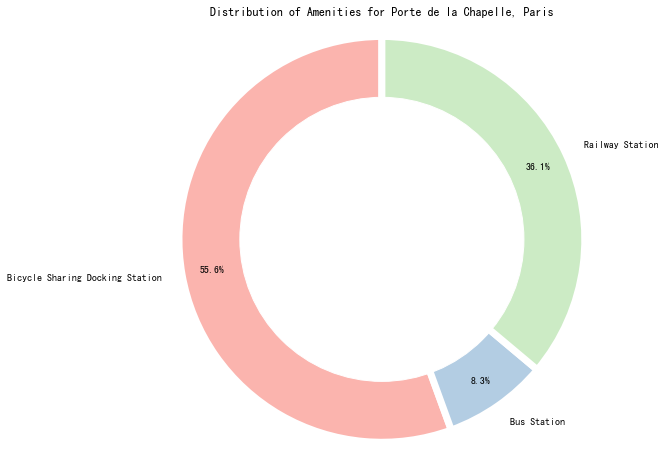

In [5]:
graph_composition_chart = hs.composition_chart_public_transportation(stations_count_df, place='Porte de la Chapelle, Paris')
graph_composition_chart.show()

In [9]:
graph_compare_places = hs.compare_places_public_transportation(stations_count_df)
graph_compare_places.show()

/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

